In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Reading the file
df_train=pd.read_csv("ticdata2000.txt",sep="\t",header = 0)
df_test=pd.read_csv("ticeval2000.txt",sep="\t",header = 0)
df_target=pd.read_csv("tictgts2000.txt",sep="\t",header = 0)


In [3]:
df_train.head()

,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45
0,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
2,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
3,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,33,1,4,2,8,0,6,0.1,3,5,...,0.37,0.38,0.39,0.40,1.12,0.41,0.42,0.43,0.44,0.45
0,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
1,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
2,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
3,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
4,30,1,2,4,7,1,4,2,3,5,...,0,0,0,0,2,0,0,0,0,0


In [5]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3999 non-null   int64
dtypes: int64(1)
memory usage: 31.4 KB


In [6]:
columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV Other relation',
           'MFALLEEN Singles','MFGEKIND Household without children','MFWEKIND Household with children','MOPLHOOG High level education',
           'MOPLMIDD Medium level education','MOPLLAAG Lower level education','MBERHOOG High status','MBERZELF Entrepreneur',
           'MBERBOER Farmer','MBERMIDD Middle management','MBERARBG Skilled labourers','MBERARBO Unskilled labourers',
           'MSKA Social class A','MSKB1 Social class B1','MSKB2 Social class B2','MSKC Social class C','MSKD Social class D',
           'MHHUUR Rented house','MHKOOP Home owners','MAUT1 1 car','MAUT2 2 cars','MAUT0 No car','MZFONDS National Health Service',
           'MZPART Private health insurance','MINKM30 Income < 30.000','MINK3045 Income 30-45.000','MINK4575 Income 45-75.000',
           'MINK7512 Income 75-122.000','MINK123M Income >123.000','MINKGEM Average income','MKOOPKLA Purchasing power class',
           'PWAPART Contribution private third party insurance','PWABEDR Contribution third party insurance','PWALAND Contribution third party insurane',
           'PPERSAUT Contribution car policies','PBESAUT Contribution delivery van policies','PMOTSCO Contribution motorcycle/scooter policies',
           'PVRAAUT Contribution lorry policies','PAANHANG Contribution trailer policies','PTRACTOR Contribution tractor policies',
           'PWERKT Contribution agricultural machines policies','PBROM Contribution moped policies','PLEVEN Contribution life insurances',
           'PPERSONG Contribution private accident insurance policies','PGEZONG Contribution family accidents insurance policies',
           'PWAOREG Contribution disability insurance policies','PBRAND Contribution fire policies','PZEILPL Contribution surfboard policies',
           'PPLEZIER Contribution boat policies','PFIETS Contribution bicycle policies','PINBOED Contribution property insurance policies',
           'PBYSTAND Contribution social security insurance policies','AWAPART Number of private third party insurance','AWABEDR Number of third party insurance',
           'AWALAND Number of third party insurane','APERSAUT Number of car policies','ABESAUT Number of delivery van policies',
           'AMOTSCO Number of motorcycle/scooter policies','AVRAAUT Number of lorry policies','AAANHANG Number of trailer policies',
           'ATRACTOR Number of tractor policies','AWERKT Number of agricultural machines policies','ABROM Number of moped policies',
           'ALEVEN Number of life insurances','APERSONG Number of private accident insurance policies','AGEZONG Number of family accidents insurance policies',
           'AWAOREG Number of disability insurance policies','ABRAND Number of fire policies','AZEILPL Number of surfboard policies',
           'APLEZIER Number of boat policies','AFIETS Number of bicycle policies','AINBOED Number of property insurance policies',
           'ABYSTAND Number of social security insurance policies','CARAVAN Number of mobile home policies']

In [7]:
df_train.columns = columns

In [8]:
df_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies,CARAVAN Number of mobile home policies
0,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
2,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
3,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
columns_1 = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV Other relation',
           'MFALLEEN Singles','MFGEKIND Household without children','MFWEKIND Household with children','MOPLHOOG High level education',
           'MOPLMIDD Medium level education','MOPLLAAG Lower level education','MBERHOOG High status','MBERZELF Entrepreneur',
           'MBERBOER Farmer','MBERMIDD Middle management','MBERARBG Skilled labourers','MBERARBO Unskilled labourers',
           'MSKA Social class A','MSKB1 Social class B1','MSKB2 Social class B2','MSKC Social class C','MSKD Social class D',
           'MHHUUR Rented house','MHKOOP Home owners','MAUT1 1 car','MAUT2 2 cars','MAUT0 No car','MZFONDS National Health Service',
           'MZPART Private health insurance','MINKM30 Income < 30.000','MINK3045 Income 30-45.000','MINK4575 Income 45-75.000',
           'MINK7512 Income 75-122.000','MINK123M Income >123.000','MINKGEM Average income','MKOOPKLA Purchasing power class',
           'PWAPART Contribution private third party insurance','PWABEDR Contribution third party insurance','PWALAND Contribution third party insurane',
           'PPERSAUT Contribution car policies','PBESAUT Contribution delivery van policies','PMOTSCO Contribution motorcycle/scooter policies',
           'PVRAAUT Contribution lorry policies','PAANHANG Contribution trailer policies','PTRACTOR Contribution tractor policies',
           'PWERKT Contribution agricultural machines policies','PBROM Contribution moped policies','PLEVEN Contribution life insurances',
           'PPERSONG Contribution private accident insurance policies','PGEZONG Contribution family accidents insurance policies',
           'PWAOREG Contribution disability insurance policies','PBRAND Contribution fire policies','PZEILPL Contribution surfboard policies',
           'PPLEZIER Contribution boat policies','PFIETS Contribution bicycle policies','PINBOED Contribution property insurance policies',
           'PBYSTAND Contribution social security insurance policies','AWAPART Number of private third party insurance','AWABEDR Number of third party insurance',
           'AWALAND Number of third party insurane','APERSAUT Number of car policies','ABESAUT Number of delivery van policies',
           'AMOTSCO Number of motorcycle/scooter policies','AVRAAUT Number of lorry policies','AAANHANG Number of trailer policies',
           'ATRACTOR Number of tractor policies','AWERKT Number of agricultural machines policies','ABROM Number of moped policies',
           'ALEVEN Number of life insurances','APERSONG Number of private accident insurance policies','AGEZONG Number of family accidents insurance policies',
           'AWAOREG Number of disability insurance policies','ABRAND Number of fire policies','AZEILPL Number of surfboard policies',
           'APLEZIER Number of boat policies','AFIETS Number of bicycle policies','AINBOED Number of property insurance policies',
           'ABYSTAND Number of social security insurance policies']

In [10]:
df_test.columns = columns_1

In [11]:
df_test.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN Number of life insurances,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies
0,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
1,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
2,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
3,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
4,30,1,2,4,7,1,4,2,3,5,...,0,0,0,0,2,0,0,0,0,0


In [12]:
df_target.columns = ['CARAVAN Number of mobile home policies']

In [13]:
df_target.head()

,CARAVAN Number of mobile home policies
0,1
1,0
2,0
3,0
4,0


In [14]:
df_train.shape

(5821, 86)

In [15]:
df_test.shape

(3999, 85)

In [16]:
df_target.shape

(3999, 1)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 86 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   MOSTYPE                                                    5821 non-null   int64
 1   MAANTHUI                                                   5821 non-null   int64
 2   MGEMOMV                                                    5821 non-null   int64
 3   MGEMLEEF                                                   5821 non-null   int64
 4   MOSHOOFD                                                   5821 non-null   int64
 5   MGODRK                                                     5821 non-null   int64
 6   MGODPR                                                     5821 non-null   int64
 7   MGODOV                                                     5821 non-null   int64
 8   MGODGE                      

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 85 columns):
 #   Column                                                     Non-Null Count  Dtype
---  ------                                                     --------------  -----
 0   MOSTYPE                                                    3999 non-null   int64
 1   MAANTHUI                                                   3999 non-null   int64
 2   MGEMOMV                                                    3999 non-null   int64
 3   MGEMLEEF                                                   3999 non-null   int64
 4   MOSHOOFD                                                   3999 non-null   int64
 5   MGODRK                                                     3999 non-null   int64
 6   MGODPR                                                     3999 non-null   int64
 7   MGODOV                                                     3999 non-null   int64
 8   MGODGE                      

In [19]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   CARAVAN Number of mobile home policies  3999 non-null   int64
dtypes: int64(1)
memory usage: 31.4 KB


- There is no null values in each train, test and target dataset.

<AxesSubplot:>

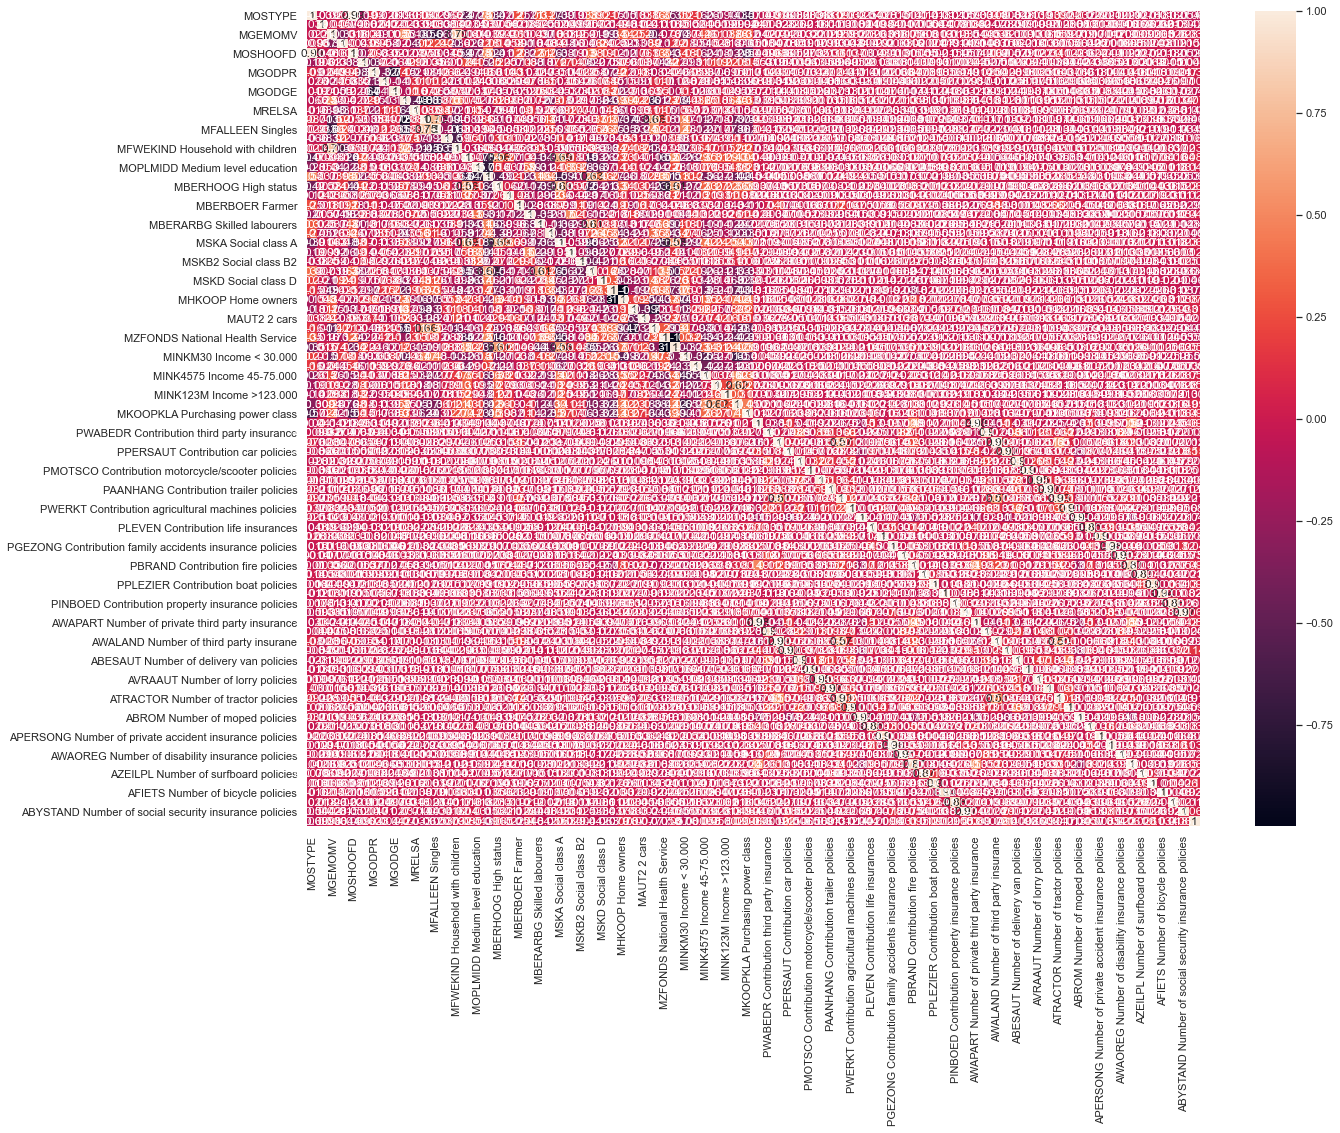

In [20]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(df_train.corr(), annot=True)

## Splitting the dataset

In [21]:
x_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

x_test = df_test
y_test = df_target

### Normalising the data in the range

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(np.array(x_train))
x_test = scaler.transform(x_test)

### Random Forest classifier

In [23]:
rf_clf = RandomForestClassifier(random_state=5)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

In [24]:
rf_predict = rf_clf.predict(x_test)
rf_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
accuracy_score(y_test, rf_predict)

0.9309827456864216

In [26]:
confusion_matrix(y_test, rf_predict)

array([[3707,   54],
       [ 222,   16]], dtype=int64)

### Support Vector classifiers

In [27]:
svc_clf = SVC()
svc_clf.fit(x_train, y_train)

SVC()

In [28]:
sv_predict = svc_clf.predict(x_test)

In [29]:
accuracy_score(y_test, sv_predict)

0.9404851212803201

In [30]:
confusion_matrix(y_test, sv_predict)

array([[3761,    0],
       [ 238,    0]], dtype=int64)

# Support Vector Classifier gives better Accuracy than Random forest classifiers